In [10]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [11]:
create_experiment_snapshots([25, 50, 75, 100])

In [12]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True


Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
Static period: 100.09207468329969
Action: 1
MTD: CompleteTopologyShuffle triggered 100.1s
MTD: Interrupted EXPLOIT_VULN at 120.2s!
Static period: 80.33219251337992
Action: 2
MTD: CompleteTopologyShuffle triggered 200.5s
Static period: 100.52875152655832
Action: 4
MTD: CompleteTopologyShuffle triggered 301.1s
MTD: Interrupted EXPLOIT_VULN at 320.6s!
Static period: 80.99403353215956
Action: 0
Static period: 80.99403353215956
Action: 4
MTD: CompleteTopologyShuffle triggered 401.6s
Static period: 100.02320904014948
Action: 0
Static period: 100.02320904014948
Action: 1
MTD: CompleteTopologyShuffle triggered 501.6s
MTD: Interrupted EXPLOIT_VULN at 523.2s!
Static period: 78.54310905491081
Action: 3
MTD: CompleteTopologyShuffle triggered 601.7s
Static period: 100.436125515262

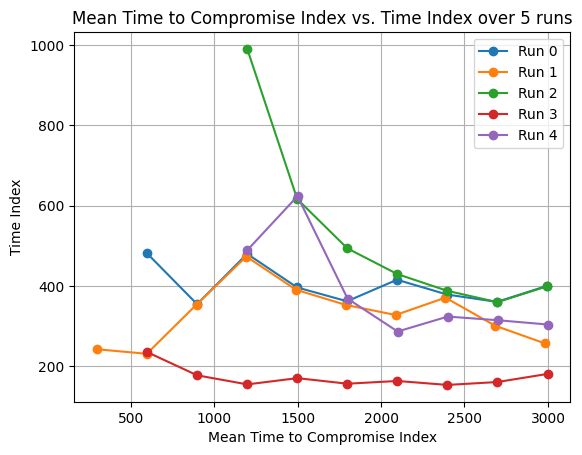

In [13]:
all_runs_list = []
runs = 5
# Run the simulation and collect data
for run_index in range(runs):  # Adjust the range for the number of runs
    features = ["host_compromise_ratio"]
    model = "main_network_final_host_compromise_ratio"
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp())
    all_runs_list.append(eva)


# Iterate over each run and plot the pairs
for run_index in range(runs):  
    plt.plot(all_runs_list[run_index]['Time'], all_runs_list[run_index]['Mean Time to Compromise'] , marker='o', linestyle='-', label=f'Run {run_index}')
plt.xlabel('Mean Time to Compromise Index')
plt.ylabel('Time Index')
plt.title(f'Mean Time to Compromise Index vs. Time over {runs} runs')
plt.grid(True)
plt.legend()
plt.show()

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
Static period: 100.61201429049454
Action: 4
MTD: CompleteTopologyShuffle triggered 100.6s
MTD: Interrupted SCAN_PORT at 120.3s!
Static period: 80.47052707847385
Action: 3
MTD: CompleteTopologyShuffle triggered 200.8s
Static period: 100.10711735625603
Action: 0
Static period: 100.10711735625603
Action: 2
MTD: CompleteTopologyShuffle triggered 300.9s
MTD: Interrupted EXPLOIT_VULN at 321.3s!
Static period: 79.64966599155179
Action: 4
MTD: CompleteTopologyShuffle triggered 400.9s
Static period: 100.94122450279826
Action: 1
MTD: CompleteTopologyShuffle triggered 501.9s
MTD: Interrupted EXPLOIT_VULN at 521.2s!
Static period: 81.16948159724552
Action: 4
MTD: CompleteTopologyShuffle triggered 602.4s
Static period: 100.95547757873737
Action: 0
Static period: 100.95547757873737

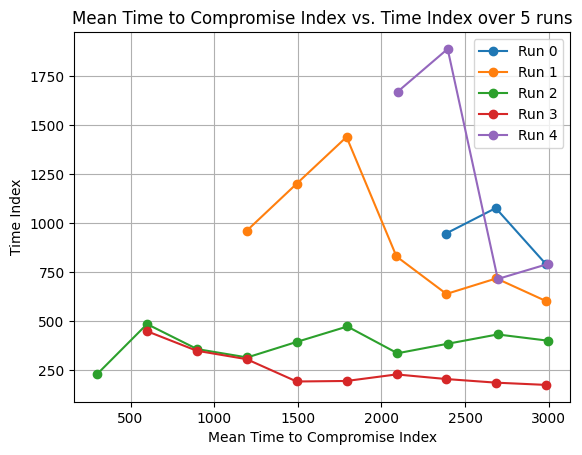

In [14]:
all_runs_list = []
runs = 5
# Run the simulation and collect data
for run_index in range(runs):  # Adjust the range for the number of runs
    features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
    model = "main_network_final_host_compromise_ratio#exposed_endpoints#attack_path_exposure#overall_asr_avg#roa#shortest_path_variability#risk"
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp())
    all_runs_list.append(eva)


# Iterate over each run and plot the pairs
for run_index in range(runs):  
    plt.plot(all_runs_list[run_index]['Time'], all_runs_list[run_index]['Mean Time to Compromise'] , marker='o', linestyle='-', label=f'Run {run_index}')
plt.xlabel('Mean Time to Compromise Index')
plt.ylabel('Time Index')
plt.title(f'Mean Time to Compromise Index vs. Time over {runs} runs')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
all_runs_list

[   Mean Time to Compromise         Time
 0               945.919826  2385.103023
 1              1076.140404  2683.240901
 2               791.886502  2981.378779,
    Mean Time to Compromise         Time
 0               960.036036  1194.213824
 1              1200.029064  1492.767280
 2              1438.842655  1791.320737
 3               829.207282  2089.874193
 4               638.044433  2388.427649
 5               717.241557  2686.981105
 6               600.915186  2985.534561,
    Mean Time to Compromise         Time
 0               227.922926   299.355556
 1               484.249763   598.711113
 2               356.609976   898.066669
 3               313.968310  1197.422225
 4               394.098644  1496.777782
 5               471.958535  1796.133338
 6               335.316877  2095.488895
 7               383.731857  2394.844451
 8               431.363933  2694.200007
 9               399.742570  2993.555564,
    Mean Time to Compromise         Time
 0           